# **Hypothesis Testing**

Joseph Lardie

September 2023

# **Imports**

In [1]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Seaborn
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt
import plotly

# Scipy
from scipy import stats
from scipy.stats import norm, pearsonr
import statsmodels.api as sm

# Warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading in datasets**

In [2]:
# Loading NYC Restaraunt Inspection Data
rdf = pd.read_csv('rdf')

In [3]:
# Loading NYC Restaraunt Yelp Review Data
ydf = pd.read_csv('ydf')

In [4]:
# Restaurant Inspection data
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  209222 non-null  int64  
 1   DBA                    208622 non-null  object 
 2   BORO                   209222 non-null  object 
 3   BUILDING               208905 non-null  object 
 4   STREET                 209216 non-null  object 
 5   ZIPCODE                206539 non-null  float64
 6   CUISINE DESCRIPTION    206788 non-null  object 
 7   INSPECTION DATE        209222 non-null  object 
 8   ACTION                 206788 non-null  object 
 9   VIOLATION CODE         205639 non-null  object 
 10  VIOLATION DESCRIPTION  205639 non-null  object 
 11  CRITICAL FLAG          209222 non-null  object 
 12  SCORE                  199283 non-null  float64
 13  GRADE                  102539 non-null  object 
 14  GRADE DATE             93926 non-nul

In [5]:
# Yelp data
ydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   alias         847 non-null    object 
 1   name          847 non-null    object 
 2   image_url     847 non-null    object 
 3   url           847 non-null    object 
 4   review_count  847 non-null    int64  
 5   categories    847 non-null    object 
 6   rating        847 non-null    float64
 7   coordinates   847 non-null    object 
 8   transactions  847 non-null    object 
 9   location      847 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 66.3+ KB


# **Data Cleaning**

In [6]:
# Selecting subset of only restaurants from Brooklyn
brooklyndf = rdf[rdf['BORO'].str.lower() == 'brooklyn']

In [7]:
# Selecting subset of only restaurants in Brooklyn that have pizza in the cuisine description
pizza_brooklyn_subset = brooklyndf[(brooklyndf['CUISINE DESCRIPTION'].str.lower() == 'pizza')]

In [8]:
# Filtering out rows with NaN in the 'GRADE' column
pizza_brooklyn_subset = pizza_brooklyn_subset.dropna(subset=['GRADE'])

In [9]:
# Taking a look at Brooklyn pizza restaurants in inspection data
print(pizza_brooklyn_subset)

           CAMIS                   DBA      BORO BUILDING  \
494     50074392      SAN MIGUEL PIZZA  Brooklyn      760   
674     41675367          J-M PIZZA II  Brooklyn     1323   
697     50086955         MARIO'S PIZZA  Brooklyn     1381   
781     50066244               IMPASTO  Brooklyn      373   
871     40544813  BENNY'S FAMOUS PIZZA  Brooklyn     4514   
...          ...                   ...       ...      ...   
208353  41129343   PINO'S LA FORCHETTA  Brooklyn      181   
208748  50105343        PROSPECT PIZZA  Brooklyn      599   
208935  50115888             PIZZA HUT  Brooklyn       29   
209088  41674167          FRANKS PIZZA  Brooklyn     8025   
209185  50094925       3 LUIGI'S PIZZA  Brooklyn      275   

                         STREET  ZIPCODE CUISINE DESCRIPTION INSPECTION DATE  \
494         CONEY ISLAND AVENUE  11218.0               Pizza      10/30/2023   
674                    AVENUE U  11229.0               Pizza      01/06/2022   
697                   65 ST

In [10]:
# Making the names of the restaurants in both data sets compatable for the merge
column_name = 'name'
# Matching up the names for both datasets
ydf['name'] = ydf['name'].apply(lambda x: str(x).upper())

In [11]:
# Merging the two data sets on the names of the restaurants 
merged_df = pd.merge(pizza_brooklyn_subset, ydf, left_on='DBA', right_on='name', how='inner', indicator=True)

# Dropping any Duplicate rows
merged_df.drop_duplicates(inplace=True)

# Displaying the merged dataframe
print("\nMerged DataFrame:")
print(merged_df)


Merged DataFrame:
        CAMIS                 DBA      BORO BUILDING          STREET  ZIPCODE  \
0    50066244             IMPASTO  Brooklyn      373  WAVERLY AVENUE  11238.0   
1    50066244             IMPASTO  Brooklyn      373  WAVERLY AVENUE  11238.0   
2    50066244             IMPASTO  Brooklyn      373  WAVERLY AVENUE  11238.0   
3    50126709          FINI PIZZA  Brooklyn      305  BEDFORD AVENUE  11211.0   
4    50126709          FINI PIZZA  Brooklyn      305  BEDFORD AVENUE  11211.0   
..        ...                 ...       ...      ...             ...      ...   
508  50115949              CROSTA  Brooklyn      486        6 AVENUE  11215.0   
509  50075379  BATTLE HILL TAVERN  Brooklyn      686        6 AVENUE  11215.0   
510  50075379  BATTLE HILL TAVERN  Brooklyn      686        6 AVENUE  11215.0   
511  41296556    ENOTECA ON COURT  Brooklyn      347    COURT STREET  11231.0   
512  41296556    ENOTECA ON COURT  Brooklyn      347    COURT STREET  11231.0   

    CUIS

In [12]:
merged_df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,...,name,image_url,url,review_count,categories,rating,coordinates,transactions,location,_merge
0,50066244,IMPASTO,Brooklyn,373,WAVERLY AVENUE,11238.0,Pizza,04/05/2023,Violations were cited in the following area(s).,02B,...,IMPASTO,https://s3-media2.fl.yelpcdn.com/bphoto/uGCoUI...,https://www.yelp.com/biz/impasto-brooklyn?adju...,25,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.5,"{'latitude': 40.686981915031, 'longitude': -73...","['pickup', 'delivery']","{'address1': '373 Waverly Ave', 'address2': ''...",both
1,50066244,IMPASTO,Brooklyn,373,WAVERLY AVENUE,11238.0,Pizza,04/05/2023,Violations were cited in the following area(s).,10F,...,IMPASTO,https://s3-media2.fl.yelpcdn.com/bphoto/uGCoUI...,https://www.yelp.com/biz/impasto-brooklyn?adju...,25,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.5,"{'latitude': 40.686981915031, 'longitude': -73...","['pickup', 'delivery']","{'address1': '373 Waverly Ave', 'address2': ''...",both
2,50066244,IMPASTO,Brooklyn,373,WAVERLY AVENUE,11238.0,Pizza,02/17/2022,Violations were cited in the following area(s).,04A,...,IMPASTO,https://s3-media2.fl.yelpcdn.com/bphoto/uGCoUI...,https://www.yelp.com/biz/impasto-brooklyn?adju...,25,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.5,"{'latitude': 40.686981915031, 'longitude': -73...","['pickup', 'delivery']","{'address1': '373 Waverly Ave', 'address2': ''...",both
3,50126709,FINI PIZZA,Brooklyn,305,BEDFORD AVENUE,11211.0,Pizza,08/30/2023,Violations were cited in the following area(s).,02B,...,FINI PIZZA,https://s3-media3.fl.yelpcdn.com/bphoto/tV_7B8...,https://www.yelp.com/biz/fini-pizza-brooklyn?a...,120,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.0,"{'latitude': 40.71348, 'longitude': -73.96182}",[],"{'address1': '305 Bedford Ave', 'address2': ''...",both
4,50126709,FINI PIZZA,Brooklyn,305,BEDFORD AVENUE,11211.0,Pizza,08/30/2023,Violations were cited in the following area(s).,10C,...,FINI PIZZA,https://s3-media3.fl.yelpcdn.com/bphoto/tV_7B8...,https://www.yelp.com/biz/fini-pizza-brooklyn?a...,120,"[{'alias': 'pizza', 'title': 'Pizza'}]",4.0,"{'latitude': 40.71348, 'longitude': -73.96182}",[],"{'address1': '305 Bedford Ave', 'address2': ''...",both


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 512
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CAMIS                  499 non-null    int64   
 1   DBA                    499 non-null    object  
 2   BORO                   499 non-null    object  
 3   BUILDING               499 non-null    object  
 4   STREET                 499 non-null    object  
 5   ZIPCODE                495 non-null    float64 
 6   CUISINE DESCRIPTION    499 non-null    object  
 7   INSPECTION DATE        499 non-null    object  
 8   ACTION                 499 non-null    object  
 9   VIOLATION CODE         497 non-null    object  
 10  VIOLATION DESCRIPTION  497 non-null    object  
 11  CRITICAL FLAG          499 non-null    object  
 12  SCORE                  499 non-null    float64 
 13  GRADE                  499 non-null    object  
 14  GRADE DATE             495 non-null    obj

In [14]:
# Dropping irrelevant of imcomplete columns
merged_df.drop(['_merge'], axis=1, inplace=True)

# **Hypothesis Testing**

## **Hypothesis Test 1:Try to find a correlation between scores on inspections and the ratings on YELP**

- The null hypothesis for this question would be that the restaurant inspection score/grade does not significantly affect the rating/reviews on Yelp for pizza restaurants in Brooklyn NY

- The alternative hypothesis for this question would be that the restaurant inspection score/grade does significantly affect the rating/ reviews on Yelp for the pizza restaurants in Brooklyn NY.

In [15]:
# Perform Pearson correlation test
correlation, p_value = pearsonr(merged_df['SCORE'], merged_df['rating'])

# Print results
print(f'Correlation: {correlation:.2f}')
print(f'P-value: {p_value:.4f}')

# Check for significance based on the p-value
if p_value > 0.05:
    print('The correlation is statistically significant.')
else:
    print('There is no significant correlation.')

Correlation: 0.14
P-value: 0.0020
There is no significant correlation.


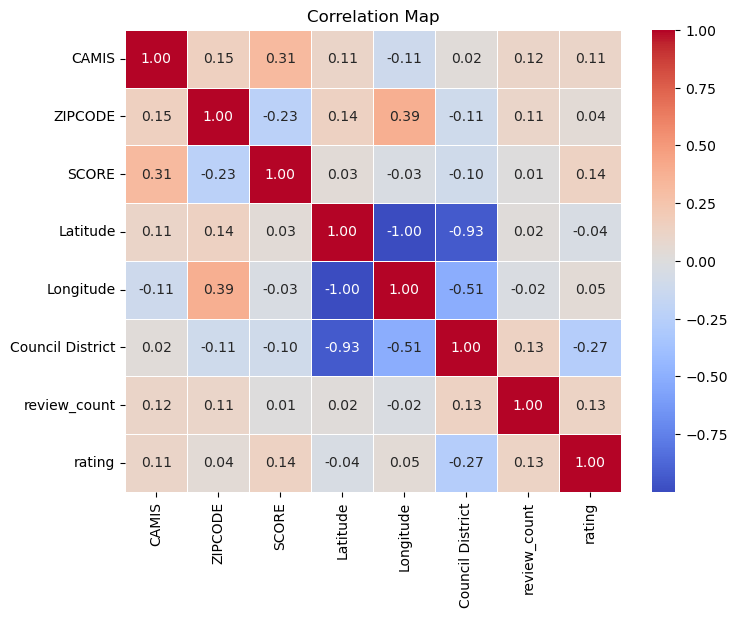

In [16]:
# Compute the correlation matrix
correlation_matrix = merged_df.corr()

# Plot the correlation heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map')
plt.show()

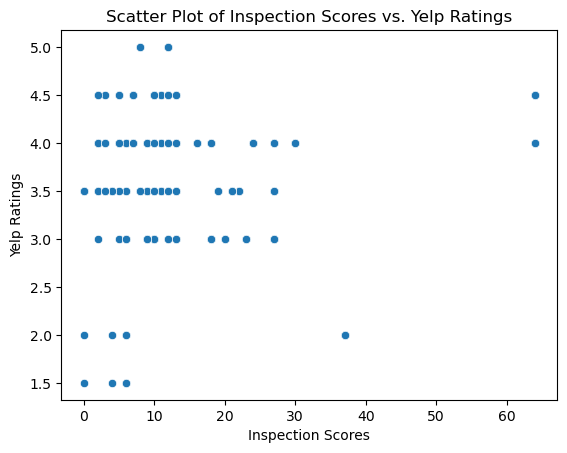

In [17]:
# Visualizing the correlation between Inspection scores and Yelp Ratings
sns.scatterplot(x=merged_df['SCORE'], y=merged_df['rating'])
plt.title('Scatter Plot of Inspection Scores vs. Yelp Ratings')
plt.xlabel('Inspection Scores')
plt.ylabel('Yelp Ratings')
plt.show()

## **Hypothesis Test 2:Try to find correlation between the inspection grades and the ratings on Yelp data**

## **Consider instead trying to find correlation between amount of reviews and ratings on Yelp data**

In [18]:
# Remove rows with 'N', 'Z', and 'P' in the 'GRADE' column
# These letters signify: N = Not Yet Graded, Z = Grade Pending,
# P= Grade Pending issued on re-opening following an initial inspection that resulted in a closure
merged_df = merged_df[~merged_df['GRADE'].isin(['N', 'Z', 'P'])]

In [20]:
merged_df['rating'].value_counts()

4.0    171
3.5    169
3.0     40
4.5     37
2.0      8
5.0      5
1.5      3
Name: rating, dtype: int64

In [21]:
merged_df['GRADE'].value_counts()

A    324
B     98
C     11
Name: GRADE, dtype: int64

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 0 to 512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CAMIS                  433 non-null    int64  
 1   DBA                    433 non-null    object 
 2   BORO                   433 non-null    object 
 3   BUILDING               433 non-null    object 
 4   STREET                 433 non-null    object 
 5   ZIPCODE                429 non-null    float64
 6   CUISINE DESCRIPTION    433 non-null    object 
 7   INSPECTION DATE        433 non-null    object 
 8   ACTION                 433 non-null    object 
 9   VIOLATION CODE         433 non-null    object 
 10  VIOLATION DESCRIPTION  433 non-null    object 
 11  CRITICAL FLAG          433 non-null    object 
 12  SCORE                  433 non-null    float64
 13  GRADE                  433 non-null    object 
 14  GRADE DATE             433 non-null    object 
 15  INSPEC

In [23]:
print("Number of non-null values in 'GRADE':", merged_df['GRADE'].count())
print("Number of non-null values in 'rating':", merged_df['rating'].count())

Number of non-null values in 'GRADE': 433
Number of non-null values in 'rating': 433


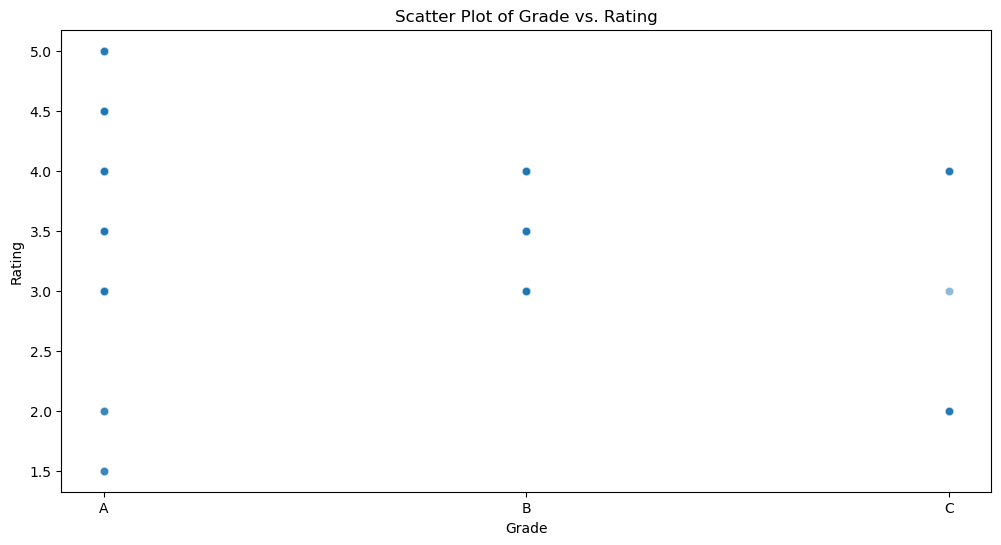

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='GRADE', y='rating', data=merged_df, alpha=0.5)
plt.title('Scatter Plot of Grade vs. Rating')
plt.xlabel('Grade')
plt.ylabel('Rating')
plt.show()

In [25]:
# review_count_counts = merged_df['review_count'].value_counts().sort_values(ascending=False)
print(merged_df['review_count'])

0       25
1       25
2       25
3      120
4      120
      ... 
508     44
509     54
510     54
511    264
512    264
Name: review_count, Length: 433, dtype: int64


In [26]:
review_count = merged_df['review_count']
rating = merged_df['rating']

# Calculate IQR
Q1 = review_count.quantile(0.25)
Q3 = review_count.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (review_count < Q1 - 1.5 * IQR) | (review_count > Q3 + 1.5 * IQR)

# Print outliers
print("Outliers:")
print(merged_df[outliers])

Outliers:
        CAMIS                        DBA      BORO BUILDING  \
67   50084972                JOE'S PIZZA  Brooklyn      483   
68   50084972                JOE'S PIZZA  Brooklyn      483   
69   50084972                JOE'S PIZZA  Brooklyn      483   
73   41349101                JOE'S PIZZA  Brooklyn      259   
74   41349101                JOE'S PIZZA  Brooklyn      259   
75   41349101                JOE'S PIZZA  Brooklyn      259   
79   50084972                JOE'S PIZZA  Brooklyn      483   
80   50084972                JOE'S PIZZA  Brooklyn      483   
81   50084972                JOE'S PIZZA  Brooklyn      483   
85   41349101                JOE'S PIZZA  Brooklyn      259   
86   41349101                JOE'S PIZZA  Brooklyn      259   
87   41349101                JOE'S PIZZA  Brooklyn      259   
91   50084972                JOE'S PIZZA  Brooklyn      483   
92   50084972                JOE'S PIZZA  Brooklyn      483   
93   50084972                JOE'S PIZZA  Bro

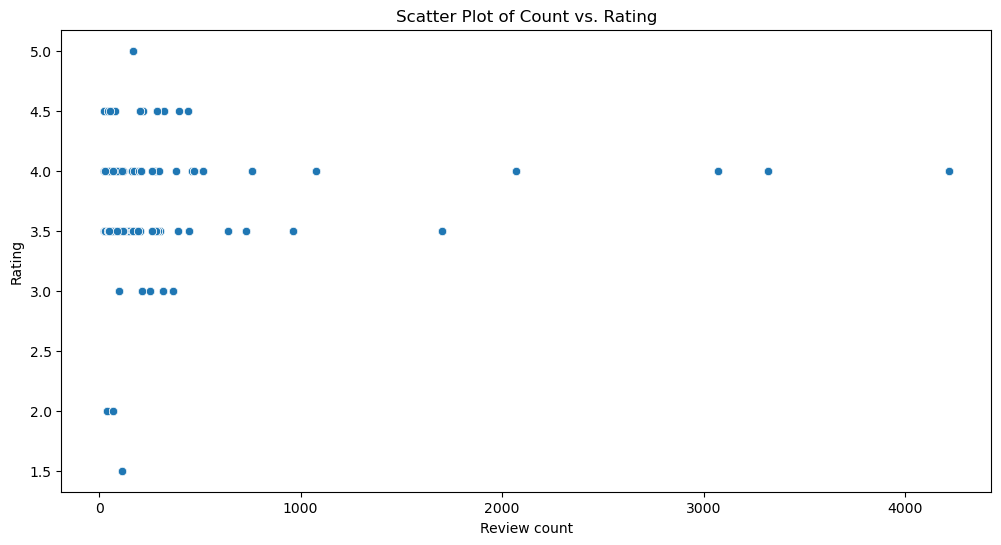

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='review_count', y='rating', data=merged_df)
plt.title('Scatter Plot of Count vs. Rating')
plt.xlabel('Review count')
plt.ylabel('Rating')
plt.show()

In [28]:
# Drop rows with NaN values if needed
original_length = len(merged_df)
merged_df = merged_df.dropna(subset=['GRADE', 'rating'])
new_length = len(merged_df)

print(f'Original length: {original_length}')
print(f'New length after dropping NaN values: {new_length}')

# Convert 'GRADE' column to numeric
merged_df['GRADE'] = pd.to_numeric(merged_df['GRADE'], errors='coerce')

# Convert 'rating' column to numeric
merged_df['rating'] = pd.to_numeric(merged_df['rating'], errors='coerce')

# Replace infinite values with NaN and drop rows with NaN values in the 'rating' column
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df.dropna(subset=['rating'], inplace=True)

# Perform Pearson correlation test
if len(merged_df['GRADE']) < 2 or len(merged_df['rating']) < 2:
    print("Not enough data points to perform the correlation test.")
else:
    # Perform Pearson correlation test
    correlation, p_value = pearsonr(merged_df['GRADE'], merged_df['rating'])

    # Print results
    print(f'Correlation: {correlation:.2f}')
    print(f'P-value: {p_value:.4f}')

    # Check for significance based on the p-value
    if p_value < 0.05:
        print('The correlation is statistically significant.')
    else:
        print('There is no significant correlation.')

Original length: 433
New length after dropping NaN values: 433


ValueError: array must not contain infs or NaNs

## **Feature Engineering**

- Find out if there is a significant correlation between certain violations for certain restaurant types of specific areas/boros.

- Most common violations for each restaurant type and each set of chains if applicable for each boro.

- Do corporate restaurants or privately owned places get better scores/grades? What are the most common violations that cost the most points on the inspections.

- Construct predictive models to predict when initial and re-inspections are going to happen

- Construct predictive models to predict which restaurants will pass/fail inspections.

- Find out if there is correlation between a higher score/grade causing a restaurant to recive an overall better score on yelp. Look at the comparison between the results for coporate and privately owned places.